# Langchain Post and Copywriting Agent
This Agent takes a transcript from a video and creates a Blog Post and a linkedin post from it

In [1]:
import os, getpass

def _set_env(var:str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}:")
_set_env("ANTHROPIC_API_KEY")
if not os.environ.get("TAVILY_API_KEY"):
    os.environ["TAVILY_API_KEY"] = getpass.getpass("Tavily API key:\n")

ANTHROPIC_API_KEY: ········
Tavily API key:
 ········


In [9]:
# instantiate LLM 
import base64
import anthropic
import httpx
from langchain_anthropic import ChatAnthropic

#define model name we use
model ="claude-3-7-sonnet-latest"

In [10]:
llm = ChatAnthropic(model=model)

In [ ]:
transcript = """

HIER KOMMT DEIN TRANSKRIPT VOM VIDEO REIN

"""

In [12]:
%pip install -qU langchain-tavily -q

Note: you may need to restart the kernel to use updated packages.


In [13]:
from langchain_tavily import TavilySearch

tool = TavilySearch(
    max_results=5,
    topic="general",
    include_answer=True,
    # include_raw_content=False,
    # include_images=False,
    # include_image_descriptions=False,
    # search_depth="basic",
    # time_range="day",
    # include_domains=None,
    # exclude_domains=None
)

In [23]:
from typing_extensions import TypedDict
# Graph state
class State (TypedDict):
    transcript : str #input
    linkedin_post : str #output
    #blog_post: str 
    best_practices_note: str #was soll berücksichtigt werden
    linkedin_post_quality: int #bewertungssystem
    language: str #originalsprache des transkripts

In [19]:
# Nodes 
def generate_linkedin_post(state: State):
    """
    Create a LinkedIn Post with emojis and matching hashtags 
    """
    msg = llm.invoke(f"Create a LinkedIn Post in {state['language']} with emojis and matching hashtags about {state['transcript']} Take also into consideration what you found out in {state['best_practices_note']}")
    return {"linkedin_post": msg.content}

def define_language(state: State): 
    """
    read part of the transcript to choose correct text language 
    """
    msg = llm.invoke(f"read part of the {state['transcript']} to choose correct target language for the text. Only give back the language as word, e.g. German. No further explanation or text!")
    print(msg.content)
    return {"language":msg.content}
    

def search_online_for_best_practices(state: State): 
    """
    Search for updated best practices to have always the best possible content quality in your posts
    """

    msg = tool.invoke("Look for 2025 LinkedIn best-practices for written posts and save them in a note")
    print(msg["answer"])
    return {"best_practices_note": msg["answer"]}

def check_linkedin_post_quality(state: State) -> int: 
    """
    Compare the created linkedin Post with the researched best-practices and give a grade which is 0 or 1. Give 1 if it is very good match
    """
    msg = llm.invoke(f"Compare the created linkedin Post from {state['linkedin_post']} with the {state['best_practices_note']} and give a grade which is 0 or 1. Give 1 if it is very good match. Only reply the grade without explanation")
    print(msg.content)
    return int(msg.content.strip())



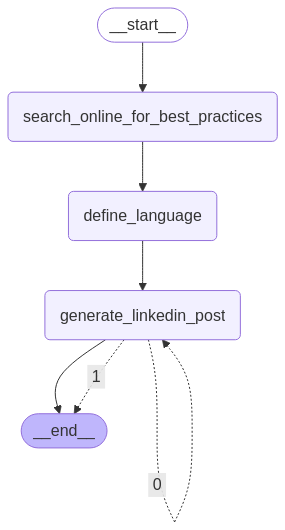

In [28]:
# add node
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

# Build workflow
workflow = StateGraph(State)

# Add nodes
workflow.add_node("generate_linkedin_post",generate_linkedin_post)
workflow.add_node("search_online_for_best_practices",search_online_for_best_practices)
workflow.add_node("define_language",define_language)

# Add edges

workflow.add_edge(START, "search_online_for_best_practices")

workflow.add_edge("search_online_for_best_practices","define_language")
workflow.add_edge("define_language","generate_linkedin_post")

workflow.add_conditional_edges("generate_linkedin_post", check_linkedin_post_quality, {1:END, 0:"generate_linkedin_post"})
workflow.add_edge("generate_linkedin_post",END)


# Compile 
chain = workflow.compile()

#Show workflow
display(Image(chain.get_graph().draw_mermaid_png()))

In [29]:
state = chain.invoke({"transcript":transcript})

In 2025, LinkedIn best practices include authentic, focused storytelling and consistent posting. Use visuals like images and videos to boost engagement. Timing posts during peak hours increases visibility.
The text is in German.
1


In [30]:
print(state["linkedin_post"])

# 🚀 KI und Agentensysteme: Aus einem Video vielfältigen Content generieren! 

Hallo liebe LinkedIn-Community! 📊

Heute möchte ich euch zeigen, wie ihr mit Hilfe von KI und Agentensystemen aus EINEM Video mehrere Content-Formate automatisch erstellen könnt - ich nenne es den "AI Multiplikator" 🔄

In meinem neuesten Video erkläre ich, wie ihr aus euren YouTube-Videos oder anderen Aufnahmen vollautomatisch Content für verschiedene Plattformen wie LinkedIn oder Blogposts generieren könnt.

Der Prozess ist einfach:
1️⃣ Video aufnehmen (mit automatischem Transkript)
2️⃣ Transkript als Input für KI-Modelle nutzen
3️⃣ Plattformspezifischen Content generieren lassen

Besonders für uns Unternehmer und Selbstständige mit knapper Zeit ist diese Methode Gold wert! Ihr behaltet die persönliche Note eures Contents, während die KI die Aufbereitung für verschiedene Plattformen übernimmt.

Im Video zeige ich euch auch, wie ich mit LangChain und Agentenfunktionen einen Post-Generator gebaut habe, der:
- 